In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-english'
MODEL_NAME = 'distilroberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

who you know make waves ina low tide?  dbo’d yo bitch now she both of ours , nigga [0 0 0 1 0]
That bitch look perfect https://t.co/L17zFSuqGQ [0 1 0 0 0]
We on all platforms now, so next time you vibing with a bad bitch, a beautiful woman, whatever you prefer. Play that FIHTEEN so she can know you different [0 1 0 0 0]
just got a haircut, anybody could take me from my bitch rn [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern If y'all fucking feel that way then do it lol.  Trump has the balls to do what democrats wish they can do.  But liberals and democrats are soft and scared to be cancelled or they don't bow down to the far left!! 😂😂Y'all are dumb as fuck it's hilarious [0 0 0 1 0]


In [6]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

who you know make waves ina low tide dbo’d yo bitch now she both of ours nigga [0 0 0 1 0]
that bitch look perfect [0 1 0 0 0]
we on all platforms now so next time you vibing with a bad bitch a beautiful woman whatever you prefer play that fihteen so she can know you different [0 1 0 0 0]
just got a haircut anybody could take me from my bitch rn [0 1 0 0 0]
barnlife5 realshawnshawn grantstern if yall fucking feel that way then do it lol trump has the balls to do what democrats wish they can do but liberals and democrats are soft and scared to be cancelled or they dont bow down to the far left 😂😂yall are dumb as fuck its hilarious [0 0 0 1 0]


In [7]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [8]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [00:54<00:00,  4.40it/s, loss=0.0293]


Train loss 0.13507772532303303 accuracy 0.8276332899869961
Validation loss 0.05100823178841376 accuracy 0.9443144138872636
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.9443144138872636
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.66it/s, loss=0.0151]


Train loss 0.044026997415696684 accuracy 0.9498374512353707
Validation loss 0.03860792785561011 accuracy 0.9574800078018334
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9574800078018334
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [00:50<00:00,  4.74it/s, loss=0.00752]


Train loss 0.03249184309825672 accuracy 0.9615734720416125
Validation loss 0.034508839824501376 accuracy 0.9621611078603471
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9621611078603471
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.68it/s, loss=0.00716]


Train loss 0.026087212154093 accuracy 0.9699934980494148
Validation loss 0.035073372489416305 accuracy 0.9677199141798323
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9677199141798323
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.72it/s, loss=0.00302]


Train loss 0.021993321150201237 accuracy 0.9764304291287387
Validation loss 0.03416796109386156 accuracy 0.9665496391652039
No improvement in validation accuracy for 1 epochs.
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:02<00:00,  3.88it/s, loss=0.00286]


Train loss 0.017103730591740536 accuracy 0.981111833550065
Validation loss 0.036174112683690994 accuracy 0.9670372537546323
No improvement in validation accuracy for 2 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.64it/s, loss=0.00183]


Train loss 0.014836062692179195 accuracy 0.9832899869960988
Validation loss 0.036942103460868014 accuracy 0.9661595474936611
No improvement in validation accuracy for 3 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.72it/s, loss=0.00147]


Train loss 0.01245330663830722 accuracy 0.9864109232769831
Validation loss 0.03841568532336595 accuracy 0.967134776672518
No improvement in validation accuracy for 4 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [00:51<00:00,  4.72it/s, loss=0.00259]


Train loss 0.009925809157509898 accuracy 0.9898569570871262
Validation loss 0.04383171694698157 accuracy 0.9657694558221182
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


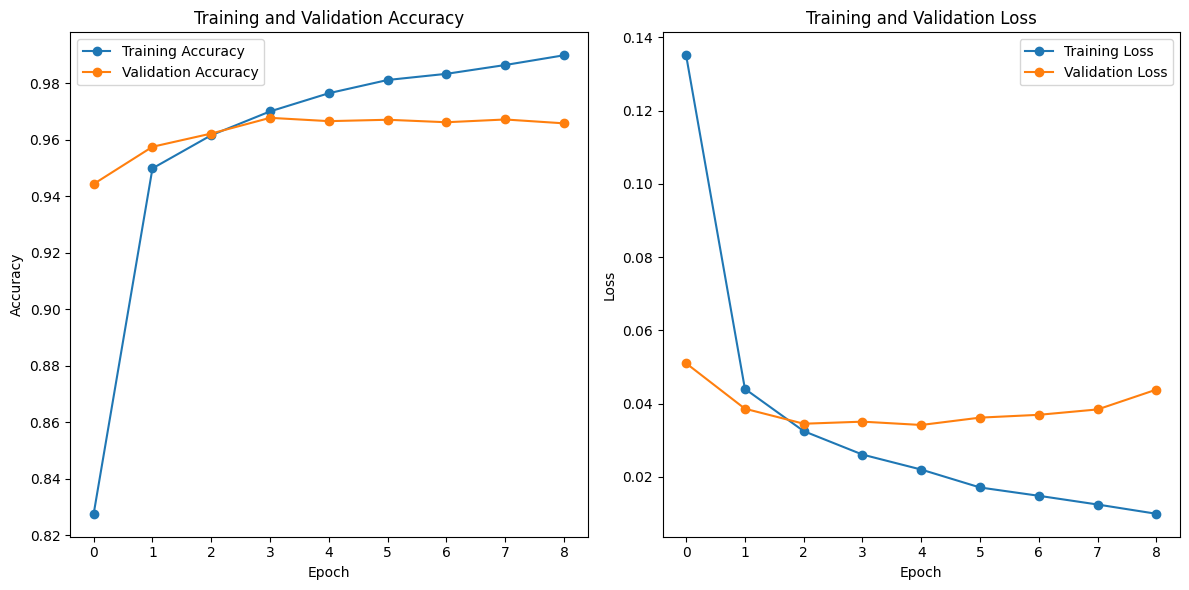

In [10]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.97 Test Loss: 0.034451505054294326


In [8]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_NAME = 'G:\My Drive\Hate Speech_Multilingual\Code\Model training\Fine_Grained_Task\Cutom Models\saved_models\distil(roberta)-english'
tokenizer = AutoTokenizer.from_pretrained(f'{MODEL_NAME}\\tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{MODEL_NAME}\model_epoch_3', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
Recall: 0.97

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.72      0.43      0.54       117
     Gender/Sexual       0.95      0.99      0.97      3342
Origin/Nationality       0.67      0.86      0.75       104
    Race/Ethnicity       0.99      0.95      0.97      3585
          Religion       0.97      0.99      0.98      3106

          accuracy                           0.97     10254
         macro avg       0.86      0.84      0.84     10254
      weighted avg       0.97      0.97      0.97     10254



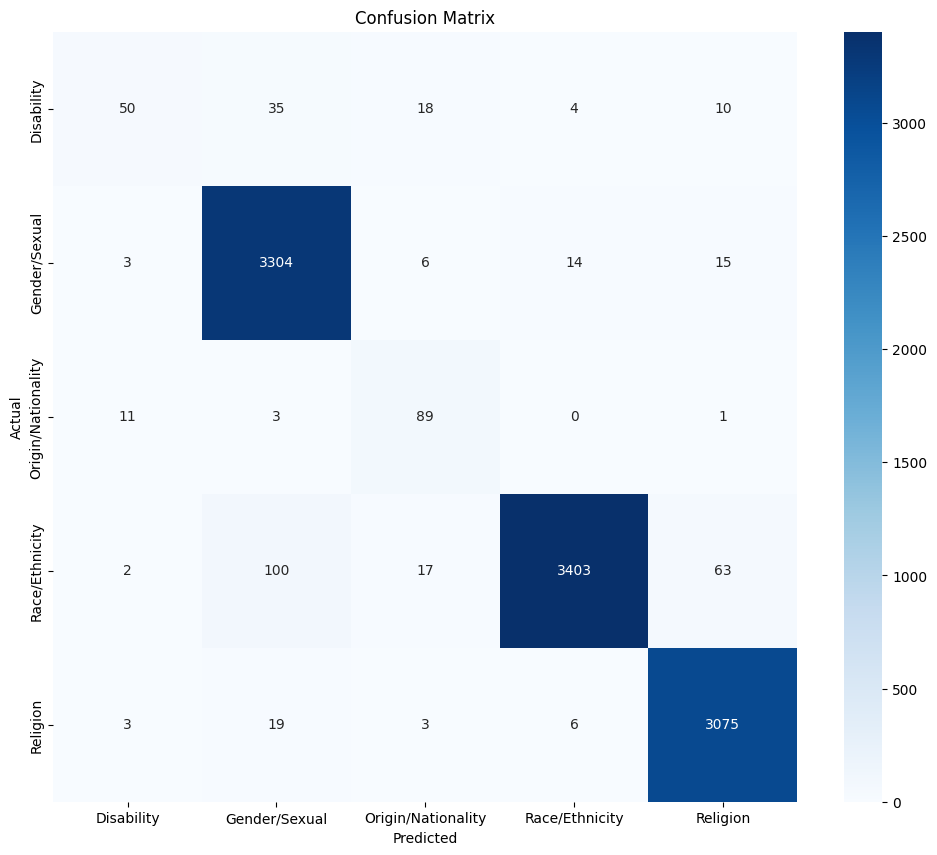

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 0.94


In [13]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
